In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
df_desconhecidos = pd.read_csv("faces_desconhecidos.csv")

In [3]:
df_conhecidos = pd.read_csv("faces.csv")

In [4]:
df = pd.concat([df_desconhecidos, df_conhecidos])

In [5]:
#df

In [6]:
X = np.array(df.drop("target", axis=1))
y = np.array(df.target)

In [7]:
X = np.array(df.drop("target", axis=1))
y = np.array(df.target)

## MISTURANDO TUDO

In [8]:
from sklearn.utils import shuffle

In [9]:
X, y = shuffle(X, y, random_state=0)

## SPLIT DATASET

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
trainX, valx, trainY, valY = train_test_split(X, y, test_size=0.10, random_state=42)

## NORMALIZANDO

In [12]:
from sklearn.preprocessing import Normalizer

In [13]:
norm = Normalizer(norm="l2")
tarinX = norm.transform(trainX)
valx = norm.transform(valx)

## TRATANDO LABELS

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
np.unique(trainY)

array(['Iasmin', 'Ilana', 'Otavio', 'desconhecidos'], dtype=object)

In [16]:
classes = len(np.unique(trainY))
classes

4

## DISCRETIZAR

In [17]:
out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)
np.unique(trainY)

array([0, 1, 2, 3])

In [18]:
out_encoder = LabelEncoder()
out_encoder.fit(valY)
valY = out_encoder.transform(valY)
np.unique(valY)

array([0, 1, 2, 3])

## USANDO KERAS

In [19]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
valY   = to_categorical(valY)

In [20]:
print(valY[0])
print(trainY[0])

[0. 0. 0. 1.]
[0. 0. 0. 1.]


In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [22]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 17,028
Trainable params: 17,028
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
batch_size=8 # quantidade de dados que pega pra treinar
epochs=40

history = model.fit(trainX, trainY, 
                    epochs=epochs, 
                    validation_data = (valx,valY), 
                    batch_size=batch_size)

Epoch 1/40
3498/3498 [==============================] - 4s 1ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.2736 - val_accuracy: 0.9582
Epoch 2/40
3498/3498 [==============================] - 4s 1ms/step - loss: 0.0198 - accuracy: 0.9920 - val_loss: 0.1987 - val_accuracy: 0.9801
Epoch 3/40
3498/3498 [==============================] - 4s 1ms/step - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.1458 - val_accuracy: 0.9846
Epoch 4/40
3498/3498 [==============================] - 3s 971us/step - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.1238 - val_accuracy: 0.9858
Epoch 5/40
3498/3498 [==============================] - 4s 1ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.1303 - val_accuracy: 0.9949
Epoch 6/40
3498/3498 [==============================] - 4s 1ms/step - loss: 0.0109 - accuracy: 0.9959 - val_loss: 0.1289 - val_accuracy: 0.9961
Epoch 7/40
3498/3498 [==============================] - 5s 1ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.1126 - val_accurac

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

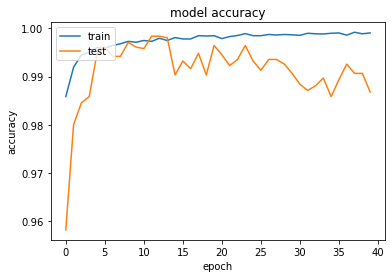

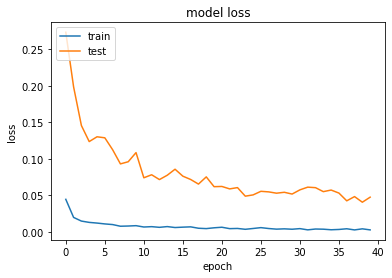

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# SUMMARIZE HISTORY FOR LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()




In [27]:
val_loss, val_acc = model.evaluate(valx, valY)

98/98 [==============================] - 0s 752us/step - loss: 0.0476 - accuracy: 0.9868


In [28]:
yhat_val = model.predict(valx)

In [29]:
valY2 = np.argmax(valY, axis = 1)
yhat_val = np.argmax(yhat_val, axis = 1)

print(valY2[0])
print(yhat_val[0])

3
3


In [30]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model_name, valY, yhat_val):
    
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0,0] + cm[1,1]) / total
    sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
    specificity = cm[1,1] / (cm[1,0] + cm[1,1])
    
    print("Modelo: {}".format(model_name))
    print("Acuracia: {:.4f}".format(acc))
    print("Sensitividade: {:.4f}".format(sensitivity))
    print("Especificidade: {:.4f}".format(specificity))
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
    plt.show()

Modelo: KERAS
Acuracia: 0.0222
Sensitividade: 0.7407
Especificidade: 0.9800


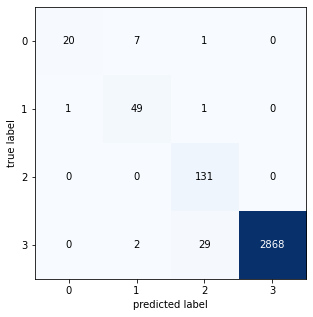

In [31]:
print_confusion_matrix("KERAS", valY2, yhat_val)

In [32]:
#model.save("faces_ComGiro60-8batch.h5")